In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/Topic_Survey_Assignment.csv')
df

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [3]:
df_1 = df.set_index('Unnamed: 0')
del df_1.index.name
df_1

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
df_2 = df_1.sort_values('Very interested', ascending = False) 
df_2

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [5]:
def normalize_df( x ):
   return round(x / 2233 * 100, 2)

In [6]:
kwargs = {"Very interested" : lambda x: normalize_df(x['Very interested']),
          "Somewhat interested" : lambda x: normalize_df(x['Somewhat interested']),
          "Not interested" : lambda x: normalize_df(x['Not interested'])}

df_3 = df_2.assign(**kwargs)
df_3

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [7]:
del df_1
del df_2

In [8]:
import numpy as np

width = 0.8
group_width = 0.8 * 3
N = len(df_3.index)
ind = np.linspace(0 + width / 2, 20 - 3 * width - width / 2, num=N) 
ind

array([ 0.4 ,  3.76,  7.12, 10.48, 13.84, 17.2 ])

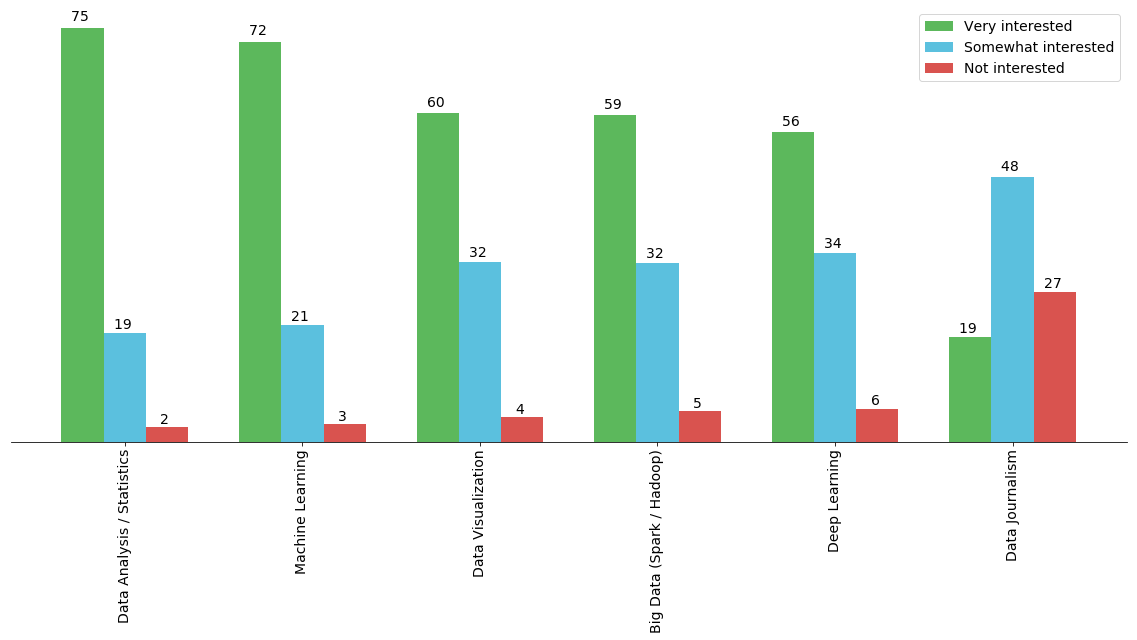

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1,1,1)

rects1 = ax.bar(ind, df_3['Very interested'], width, color='#5cb85c')
rects2 = ax.bar(ind + width, df_3['Somewhat interested'], width, color='#5bc0de')
rects3 = ax.bar(ind + 2 * width, df_3['Not interested'], width, color='#d9534f')

ax.legend((rects1[0], rects2[0], rects3[0]), 
          ('Very interested', 'Somewhat interested', 'Not interested'), 
         fontsize = 14)

ax.set_xticks(ind + width)
ax.set_xticklabels(list(df_3.index), fontsize = 14, rotation=90)

ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                1.01*height,
                '%d ' % int(height),
                ha='center', 
                va='bottom',
                fontsize = 14)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [12]:
df = pd.read_csv('../data/raw/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [22]:
df_1 = df.groupby('PdDistrict').size().reset_index(name='Count')
df_1.rename(index=str, columns={'PdDistrict': 'Neighborhood'})

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942
